In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: K-Fold Cross-Validation
# We'll use 5-fold cross-validation in this example
k = 5

# Step 3: Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Step 4: Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 5: Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=k, scoring='accuracy')
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Step 6: Extract the best estimator (model) from the grid search results
best_rf_model = grid_search.best_estimator_

# Step 7: Final Model Evaluation
# Split the data into training and testing sets (for the final model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the final Random Forest model (best estimator) on the entire training set
best_rf_model.fit(X_train, y_train)

# Evaluate the final model on the test set
final_accuracy = best_rf_model.score(X_test, y_test)
print("Final Model Test Accuracy:", final_accuracy)


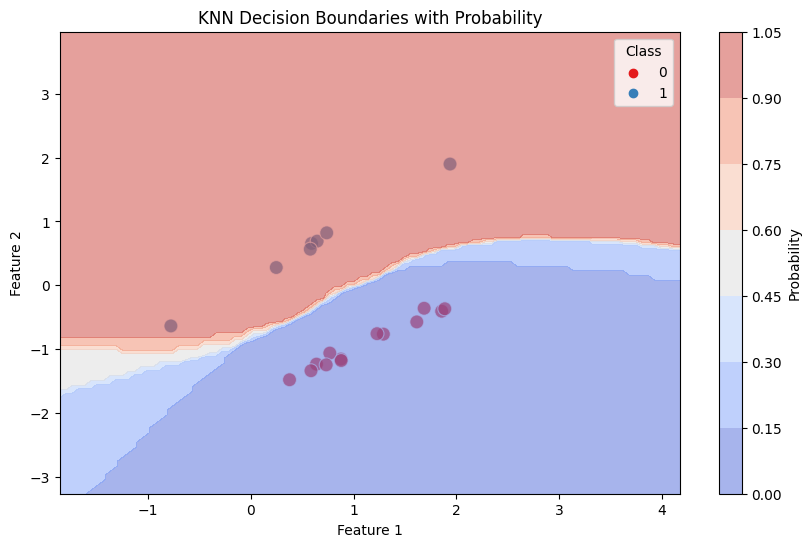

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Generate synthetic data for demonstration
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_classes=2, 
    n_clusters_per_class=1, 
    random_state=42,
    n_informative=2,    # Adjust these parameters
    n_redundant=0,      # to ensure their sum is less
    n_repeated=0        # than n_features
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a grid to visualize decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
mesh_data = np.c_[xx.ravel(), yy.ravel()]
probabilities = knn.predict_proba(mesh_data)[:, 1]
probabilities = probabilities.reshape(xx.shape)

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette="Set1", marker="o", s=100, alpha=0.7)
plt.contourf(xx, yy, probabilities, cmap="coolwarm", alpha=0.5)

# Customize the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundaries with Probability")
plt.legend(title="Class", loc="upper right")
plt.colorbar(label="Probability", orientation="vertical")

# Show the plot
plt.show()


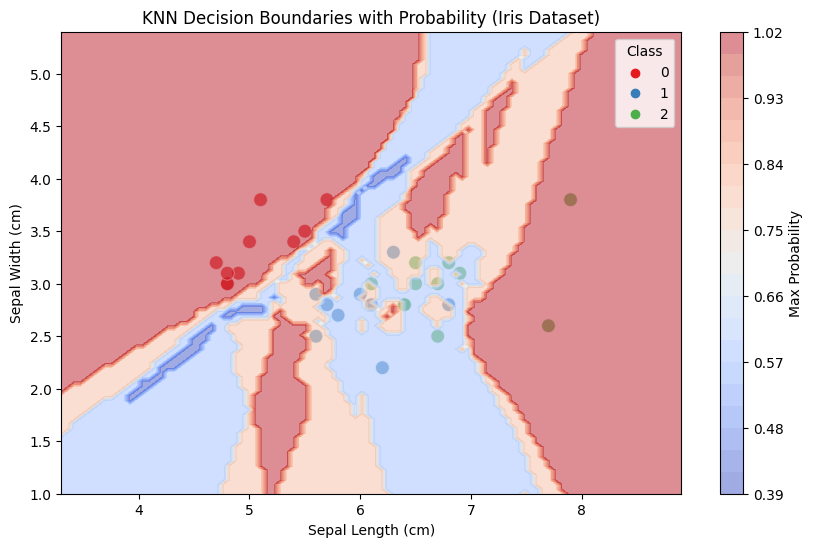

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for simplicity
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a grid to visualize decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
mesh_data = np.c_[xx.ravel(), yy.ravel()]
probabilities = knn.predict_proba(mesh_data)
probabilities_max = probabilities.max(axis=1)
probabilities_max = probabilities_max.reshape(xx.shape)

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette="Set1", marker="o", s=100, alpha=0.7)
contour = plt.contourf(xx, yy, probabilities_max, cmap="coolwarm", alpha=0.5, levels=20)

# Customize the plot
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("KNN Decision Boundaries with Probability (Iris Dataset)")
plt.legend(title="Class", loc="upper right")
plt.colorbar(contour, label="Max Probability", orientation="vertical")

# Show the plot
plt.show()
